In [1]:
from Analise_leiloes import *
from pprint import pprint

# Inputs

In [2]:
auction_date = '2025-07-16 10:30:00'
announcement_date = '2025-07-11 16:00:00'
spread_fixing = None
books_closing = None
pricing = None
auction_type = 'BT'
auction_name = 'Emissão BT 17 JUL 2026'
maturity = '20260717'
data_dict = fetch_data(QUERIES, db_paths, today_date) 
df_portugal = data_dict.get("portugal")[0]
df_spain = data_dict.get("spain")[0]
df_italy =data_dict.get("italy")[0]
df_germany = data_dict.get("germany")[0]
calculation_dates = calculate_auction_dates(df_italy, df_spain, df_portugal,df_germany, auction_date,announcement_date,spread_fixing, books_closing, pricing,auction_type, maturity )
tickers = {k: calculation_dates[k] for k in  [
    'PT_principal', 'SP_principal', 'IT_principal', 'GE_principal',
    'PT_esq', 'SP_esq', 'IT_esq', 'GE_esq',
    'PT_dir', 'SP_dir', 'IT_dir', 'GE_dir'
]}

# Ver Tickers Datas a Utilizar

In [3]:
print("\n Auction Information:")
pprint(calculation_dates, sort_dicts=False)


 Auction Information:
{'auction_date': '2025-07-16 10:30:00',
 'announcement_date': '2025-07-11 16:00:00',
 'two_days_before_announcement': '2025-07-09 16:00:00',
 'three_days_after_auction': '2025-07-21 10:30:00',
 'Pricing': None,
 'Spread_Fixing': None,
 'Books_Closing': None,
 'PT_principal': 'YM236329 Corp',
 'SP_principal': 'YS938674 Corp',
 'IT_principal': 'YM105920 Corp',
 'GE_principal': 'YM118622 Corp',
 'PT_esq': 'YO572651 Corp',
 'SP_esq': 'YS938672 Corp',
 'IT_esq': 'YO279381 Corp',
 'GE_esq': 'YO256136 Corp',
 'PT_dir': 'JV651374 Corp',
 'SP_dir': 'EI604597 Corp',
 'IT_dir': 'ZS105647 Corp',
 'GE_dir': 'LW743065 Corp'}


# Analisar tickers a usar

In [4]:
#miss=Missing_data(auction_name,tickers,calculation_dates,db_paths)

In [5]:
#iss

In [6]:
db = data_transformation(auction_name,tickers,calculation_dates,db_paths,check_dates=False)


 Yield Mean:
PT_principal    1.919655
PT_esq          1.931070
PT_dir          1.868891
SP_principal    1.916249
SP_esq          1.919986
PT_dir          1.868891
IT_principal    1.957909
IT_esq          1.943603
IT_dir          1.931193
GE_principal    1.783854
GE_esq          1.641657
GE_dir          1.818177


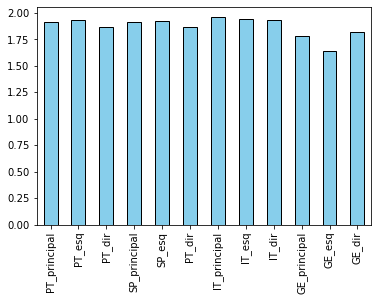

In [7]:
db[["PT_principal","PT_esq","PT_dir",
    "SP_principal","SP_esq","PT_dir",
    "IT_principal","IT_esq","IT_dir",
   "GE_principal","GE_esq","GE_dir"]].mean().plot(kind='bar', color='skyblue', edgecolor='black')
print("\n Yield Mean:")
print(db[["PT_principal","PT_esq","PT_dir",
    "SP_principal","SP_esq","PT_dir",
    "IT_principal","IT_esq","IT_dir",
   "GE_principal","GE_esq","GE_dir"]].mean().to_string())

In [8]:
spread = spreads(db,auction_name)
spread_data= process_spread_data(db,spread,auction_name, calculation_dates, df_portugal, tickers)
filtered_yields=process_yield_and_spread_by_date(db, spread, auction_name,calculation_dates)
variations=process_variations(db,spread,auction_name,calculation_dates)
histogram = process_histogram(data_dict, variations,calculation_dates, window = 100, num_bins=17,rolling_mean = True)
statistics = process_stats(data_dict, variations, calculation_dates,window = 100, rolling_mean = True)



# Visualizar Spreads e Yields

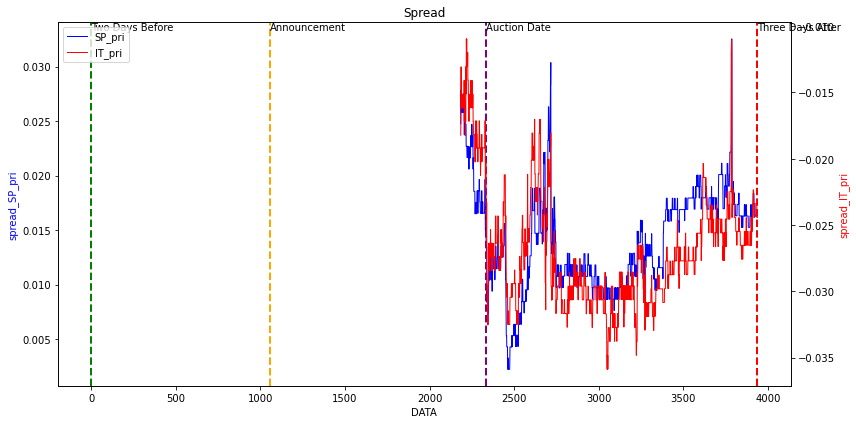

In [9]:
plot_data(spread, spread_data, spread_str="SP-IT", instrumento="pri",tipo = "spread" )

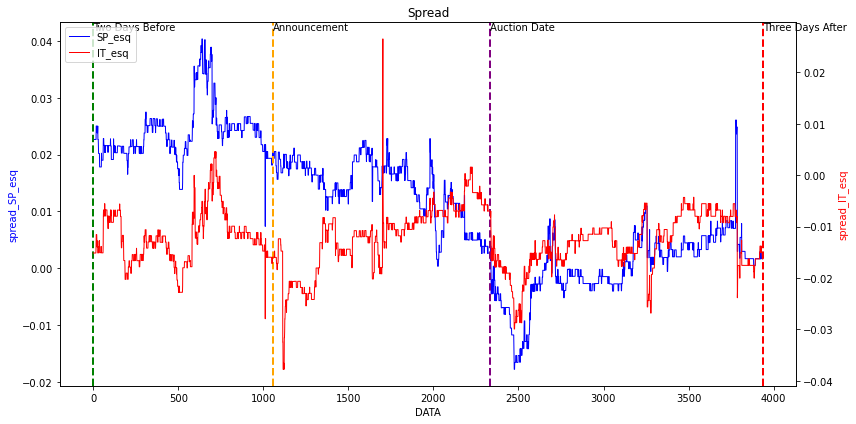

In [10]:
plot_data(spread, spread_data, spread_str="SP-IT", instrumento="esq",tipo = "spread" )

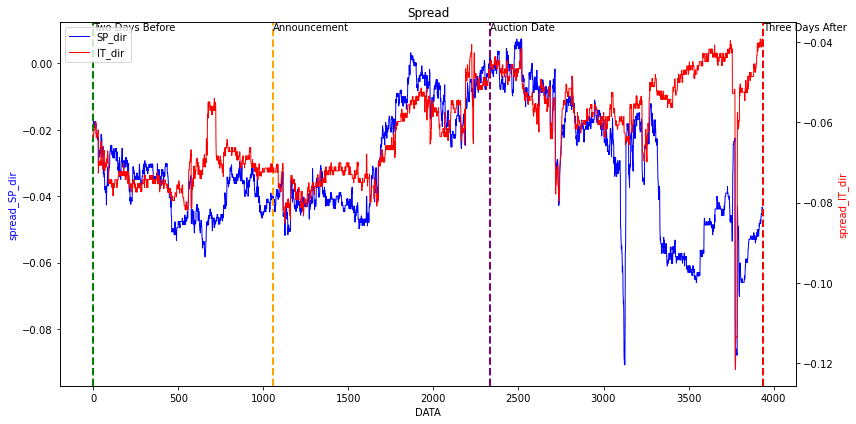

In [11]:
plot_data(spread, spread_data, spread_str="SP-IT", instrumento="dir",tipo = "spread" )

# Visualizar Histograma

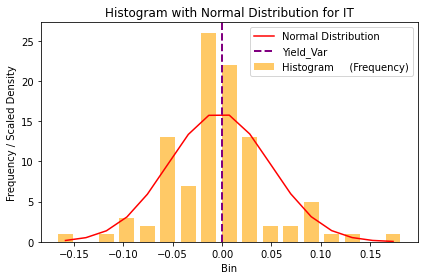

Info:
Auction                     Emissão BT 17 JUL 2026
DATA_HORA                      2025-07-16 10:30:00
Label              Auction Date - Three Days After
Yield_Type                           Var Spread_IT
Auction_Type                                    BT
Yield_Var                                 0.000293
Historical_Mean                          -0.002969
Historical_Std                            0.051463
Skewness                                  0.392881
Kurtosis                                   2.10523
Percentile                               52.527256
Name: 5, dtype: object


In [12]:
plot_histograma(auction_name,histogram,statistics,country = "IT")

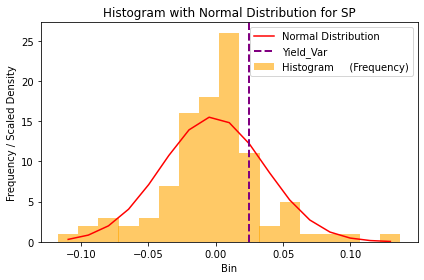

Info:
Auction                     Emissão BT 17 JUL 2026
DATA_HORA                      2025-07-16 10:30:00
Label              Auction Date - Three Days After
Yield_Type                           Var Spread_SP
Auction_Type                                    BT
Yield_Var                                 0.024388
Historical_Mean                          -0.001917
Historical_Std                            0.038341
Skewness                                   0.07548
Kurtosis                                  2.276249
Percentile                               75.367377
Name: 2, dtype: object


In [13]:
plot_histograma(auction_name,histogram,statistics,country = "SP")

### Big variations

In [99]:
spread_ = spread.copy()

In [100]:
spread.columns

Index(['DATA_HORA', 'PT_principal', 'SP_principal', 'IT_principal',
       'GE_principal', 'PT_esq', 'SP_esq', 'IT_esq', 'GE_esq', 'PT_dir',
       'SP_dir', 'IT_dir', 'GE_dir', 'Spread_SP_pri', 'Spread_SP_esq',
       'Spread_SP_dir', 'Spread_IT_pri', 'Spread_IT_esq', 'Spread_IT_dir',
       'Spread_GE_pri', 'Spread_GE_esq', 'Spread_GE_dir', 'Var Spread_SP',
       'Var Spread_IT', 'Var Spread_GE', 'Med_Spread_SP', 'Med_Spread_IT',
       'Auction'],
      dtype='object')

In [101]:
spread_=spread_.set_index("DATA_HORA")

In [102]:
spread_ = spread_[["Spread_SP_pri","Spread_IT_pri","Spread_GE_pri","Spread_SP_esq","Spread_IT_esq","Spread_GE_esq","Spread_SP_dir","Spread_IT_dir","Spread_GE_dir"]]

In [103]:
spread_ = spread_.diff(-30)

In [104]:
spread_ = spread_.iloc[:-1]

In [105]:
spread_

,Spread_SP_pri,Spread_IT_pri,Spread_GE_pri,Spread_SP_esq,Spread_IT_esq,Spread_GE_esq,Spread_SP_dir,Spread_IT_dir,Spread_GE_dir
DATA_HORA,,,,,,,,,
2025-07-09 16:00:00,NaN,NaN,NaN,0.001235,-0.001212,-0.001210,0.016274,0.009846,0.013572
2025-07-09 16:01:00,NaN,NaN,NaN,0.002469,-0.001212,-0.004837,0.011574,0.006840,0.011643
2025-07-09 16:02:00,NaN,NaN,NaN,0.002469,-0.001212,-0.004837,0.009764,0.007822,0.012625
2025-07-09 16:03:00,NaN,NaN,NaN,0.002469,-0.001212,-0.004837,0.007852,0.006840,0.010695
2025-07-09 16:04:00,NaN,NaN,NaN,0.002469,-0.001212,-0.004837,0.008784,0.007852,0.010695
...,...,...,...,...,...,...,...,...,...
2025-07-21 10:25:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-07-21 10:26:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-07-21 10:27:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
top_n = 5 

for col in spread_.columns:
    print(f"\n Top {top_n} absolute changes for: {col}")
    top_changes = spread_[col].abs().nlargest(top_n)
    
    print(top_changes)


 Top 5 absolute changes for: Spread_SP_pri
DATA_HORA
2025-07-16 16:29:00    0.016481
2025-07-16 16:59:00    0.016481
2025-07-18 16:59:00    0.016234
2025-07-18 16:57:00    0.016215
2025-07-18 16:58:00    0.016215
Name: Spread_SP_pri, dtype: float64

 Top 5 absolute changes for: Spread_IT_pri
DATA_HORA
2025-07-18 16:58:00    0.015481
2025-07-18 16:59:00    0.014442
2025-07-18 16:57:00    0.014432
2025-07-18 16:26:00    0.013499
2025-07-18 16:27:00    0.013499
Name: Spread_IT_pri, dtype: float64

 Top 5 absolute changes for: Spread_GE_pri
DATA_HORA
2025-07-18 16:57:00    0.035223
2025-07-18 16:58:00    0.035223
2025-07-18 16:56:00    0.034184
2025-07-18 16:59:00    0.034184
2025-07-18 16:26:00    0.033565
Name: Spread_GE_pri, dtype: float64

 Top 5 absolute changes for: Spread_SP_esq
DATA_HORA
2025-07-18 16:56:00    0.021868
2025-07-18 16:57:00    0.021868
2025-07-18 16:58:00    0.021868
2025-07-18 16:59:00    0.021868
2025-07-18 16:50:00    0.020638
Name: Spread_SP_esq, dtype: float64


### Bar plot of max absolute diff in Spreads

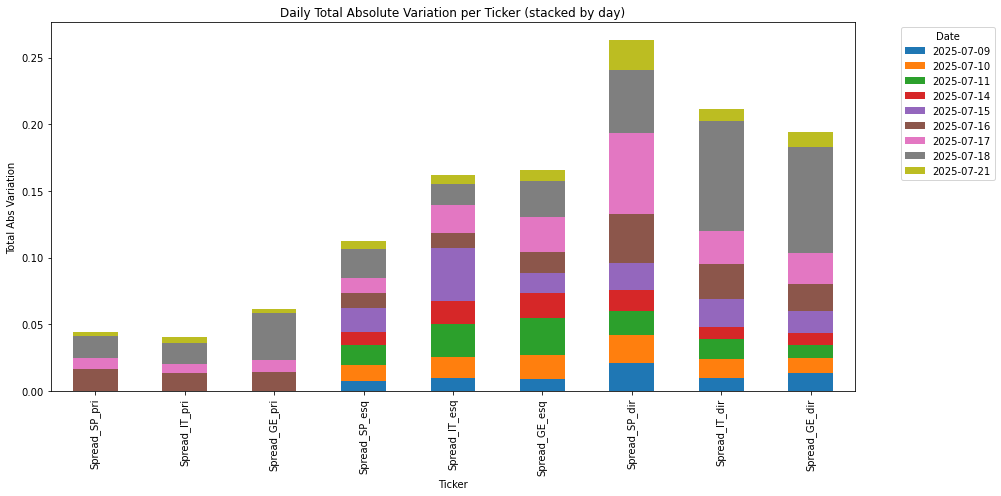

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

spread_.index = pd.to_datetime(spread_.index)
daily_sum = spread_.abs().groupby(spread_.index.date).max()
daily_sum.T.plot(kind='bar', stacked=True, figsize=(14, 7))

plt.title("Daily Total Absolute Variation per Ticker (stacked by day)")
plt.ylabel("Total Abs Variation")
plt.xlabel("Ticker")
plt.legend(title="Date", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Heat Map of max absolute diff in Spreads

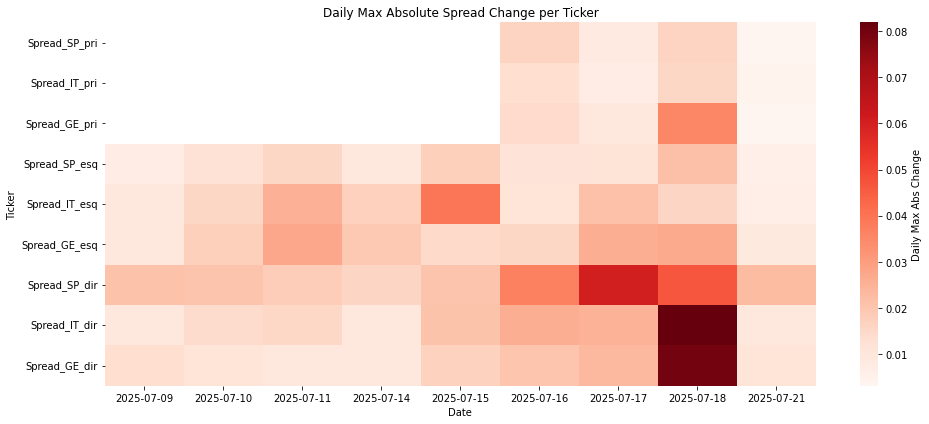

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt


spread_.index = pd.to_datetime(spread_.index)
daily_diff = spread_.abs().groupby(spread_.index.date).max()  
daily_diff = daily_diff.T  
plt.figure(figsize=(14, 6))
sns.heatmap(daily_diff, cmap="Reds", cbar_kws={'label': 'Daily Max Abs Change'})
plt.title("Daily Max Absolute Spread Change per Ticker")
plt.xlabel("Date")
plt.ylabel("Ticker")
plt.tight_layout()
plt.show()

